In [1]:
from stereomolgraph import StereoMolGraph
from stereomolgraph.stereodescriptors import AtropBond
from stereomolgraph.ipython import View2D
import rdkit

View2D.generate_bond_orders = False

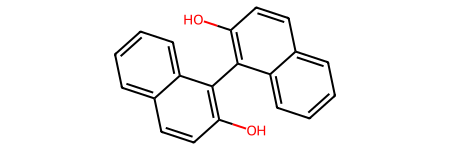

In [2]:
binol = rdkit.Chem.MolFromInchi("InChI=1S/C20H14O2/c21-17-11-9-13-5-1-3-7-15(13)19(17)20-16-8-4-2-6-14(16)10-12-18(20)22/h1-12,21-22H", sanitize=True)
binol

PlanarBond((4, 22, 0, 2, 6, 24), 0)
PlanarBond((2, 22, 0, 4, 12, 26), 0)
PlanarBond((5, 23, 1, 3, 7, 25), 0)
PlanarBond((3, 23, 1, 5, 13, 27), 0)
PlanarBond((0, 24, 2, 6, 14, 28), 0)
PlanarBond((1, 25, 3, 7, 15, 29), 0)
PlanarBond((0, 26, 4, 12, 8, 14), 0)
PlanarBond((1, 27, 5, 13, 9, 15), 0)
PlanarBond((2, 28, 6, 14, 12, 18), 0)
PlanarBond((3, 29, 7, 15, 13, 19), 0)
PlanarBond((12, 30, 8, 10, 16, 32), 0)
PlanarBond((10, 30, 8, 12, 4, 14), 0)
PlanarBond((13, 31, 9, 11, 17, 33), 0)
PlanarBond((11, 31, 9, 13, 5, 15), 0)
PlanarBond((8, 32, 10, 16, 18, 20), 0)
PlanarBond((9, 33, 11, 17, 19, 21), 0)
PlanarBond((4, 8, 12, 14, 6, 18), 0)
PlanarBond((5, 9, 13, 15, 7, 19), 0)
PlanarBond((6, 12, 14, 18, 16, 19), 0)
PlanarBond((7, 13, 15, 19, 17, 18), 0)
PlanarBond((10, 20, 16, 18, 14, 19), 0)
PlanarBond((11, 21, 17, 19, 15, 18), 0)
AtropBond((15, 17, 19, 18, 16, 14), 0)
AtropBond((15, 17, 19, 18, 16, 14), 0)


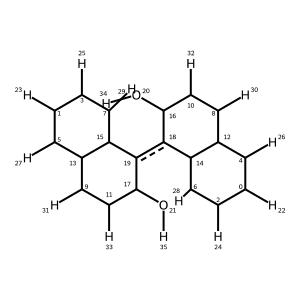

In [11]:
smg = StereoMolGraph.from_rdmol(binol)
smg.set_bond_stereo(AtropBond((15,17,19,18,16,14), parity=0))
smg.bond_stereo
smg

In [20]:
new_rdmol = smg.to_rdmol(generate_bond_orders=True)

PlanarBond((4, 22, 0, 2, 6, 24), 0)
PlanarBond((2, 22, 0, 4, 12, 26), 0)
PlanarBond((5, 23, 1, 3, 7, 25), 0)
PlanarBond((3, 23, 1, 5, 13, 27), 0)
PlanarBond((0, 24, 2, 6, 14, 28), 0)
PlanarBond((1, 25, 3, 7, 15, 29), 0)
PlanarBond((0, 26, 4, 12, 8, 14), 0)
PlanarBond((1, 27, 5, 13, 9, 15), 0)
PlanarBond((2, 28, 6, 14, 12, 18), 0)
PlanarBond((3, 29, 7, 15, 13, 19), 0)
PlanarBond((12, 30, 8, 10, 16, 32), 0)
PlanarBond((10, 30, 8, 12, 4, 14), 0)
PlanarBond((13, 31, 9, 11, 17, 33), 0)
PlanarBond((11, 31, 9, 13, 5, 15), 0)
PlanarBond((8, 32, 10, 16, 18, 20), 0)
PlanarBond((9, 33, 11, 17, 19, 21), 0)
PlanarBond((4, 8, 12, 14, 6, 18), 0)
PlanarBond((5, 9, 13, 15, 7, 19), 0)
PlanarBond((6, 12, 14, 18, 16, 19), 0)
PlanarBond((7, 13, 15, 19, 17, 18), 0)
PlanarBond((10, 20, 16, 18, 14, 19), 0)
PlanarBond((11, 21, 17, 19, 15, 18), 0)
AtropBond((15, 17, 19, 18, 16, 14), 0)
AtropBond((15, 17, 19, 18, 16, 14), 0)


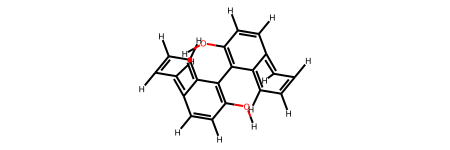

In [21]:
new_rdmol

In [23]:
from rdkit import Chem

def print_bond_stereochemistry(mol):
    print(f"Bond stereochemistry in molecule: {Chem.MolToSmiles(mol)}")
    print("{:<5} {:<5} {:<15} {:<10}".format("Idx", "Type", "Bond Stereo", "Atoms"))
    
    for bond in mol.GetBonds():
        bond_idx = bond.GetIdx()
        atom1_idx = bond.GetBeginAtomIdx()
        atom2_idx = bond.GetEndAtomIdx()
        bond_type = bond.GetBondType()
        
        # Get bond stereo information
        bond_stereo = bond.GetStereo()
        stereo_str = str(bond_stereo)
        
        print("{:<5} {:<5} {:<15} {}-{}".format(
            bond_idx, bond_type, stereo_str, atom1_idx, atom2_idx))


# Print bond stereochemistry
print_bond_stereochemistry(new_rdmol)

Bond stereochemistry in molecule: [H]OC1=C(C2=C(O[H])C([H])=C([H])C3=C([H])C([H])=C([H])C([H])=C23)C2=C([H])C([H])=C([H])C([H])=C2C([H])=C1[H]
Idx   Type  Bond Stereo     Atoms     
0     2     STEREOZ         0-2
1     1     STEREOZ         0-4
2     1     STEREONONE      0-22
3     2     STEREOZ         1-3
4     1     STEREOZ         1-5
5     1     STEREONONE      1-23
6     1     STEREOZ         2-6
7     1     STEREONONE      2-24
8     1     STEREOZ         3-7
9     1     STEREONONE      3-25
10    2     STEREOZ         4-12
11    1     STEREONONE      4-26
12    2     STEREOZ         5-13
13    1     STEREONONE      5-27
14    2     STEREOZ         6-14
15    1     STEREONONE      6-28
16    2     STEREOZ         7-15
17    1     STEREONONE      7-29
18    2     STEREOZ         8-10
19    1     STEREOZ         8-12
20    1     STEREONONE      8-30
21    2     STEREOZ         9-11
22    1     STEREOZ         9-13
23    1     STEREONONE      9-31
24    1     STEREOZ         10-1